<a href="https://colab.research.google.com/github/nbchan/INMR96-Digital-Health-and-Data-Analytics/blob/main/Week_04_Tabular_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. What is Pandas and Why Pandas?

* the go-to Python package/library for column-oriented data analysis
* great tool for handling and analyzing tabular data
* many machine learning frameworks support pandas data structures as inputs


For a complete reference to pandas functions, the [*Pandas* documentation](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive info and many tutorials.

---

# 2. Basic Concepts

Similar to how you would import packages in [R](https://www.r-project.org/about.html) using `library()`, the following line **imports** the *pandas* library to your current notebook. This line is usually put in the beginning of your code.

Note that the `as` keyword is used to create an alias for the package.

In [1]:
import pandas as pd

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**: A relational data table with rows and named columns.
  * **`Series`**: A single column that stores a set of data. A `DataFrame` contains one or more `Series`; and a name for each `Series`.

The dataframe is a commonly used abstraction for data manipulation, similar to R.

![pandas-data-structure](https://raw.githubusercontent.com/niuguy/digithealthcourse/master/pics/pandas-data-structure.png)


One way to create a `Series` is to construct a `Series` object. For example:

In [2]:
pd.Series(['Alex', 'Brenda', 'Cindy'])

0      Alex
1    Brenda
2     Cindy
dtype: object

`DataFrame` objects can be created by passing a Python dictionary that maps column names to their respective `Series`. For example:

In [3]:
customer = pd.Series(['Alex', 'Brenda', 'Cindy'])
spendings = pd.Series([100, 300, 250])
country = pd.Series(['UK', 'France', 'Ireland'])

df_customer = pd.DataFrame({'name': customer, 'spendings': spendings, 'country': country})

In [4]:
df_customer

,name,spendings,country
0,Alex,100,UK
1,Brenda,300,France
2,Cindy,250,Ireland


To retrieve a column (as a `Series`) from a `DataFrame`, use square brackets:

In [5]:
df_customer['spendings']

0    100
1    300
2    250
Name: spendings, dtype: int64

To retrieve multiple columns, put a list of column names within the square brackets instead of a string:

In [6]:
df_customer[['name', 'country']]

,name,country
0,Alex,UK
1,Brenda,France
2,Cindy,Ireland


---

# 3. Importing MIMIC-III data from BigQuery as a Pandas `DataFrame` 

Most of the time, instead of creating `DataFrame`'s from scratch in Python, you load an entire file as a DataFrame. In our case, we would import MIMIC-III data via BigQuery. There are a few steps to do so.

## 3.1. Provide your credentials to the Colab runtime

Run the following code. You will be given a link that requests permission of the notebook to access your data from BigQuery. Enter that link and accept the request. You might be asked to enter your password in this step. 

After that, you will be given a one-time authentication token. Copy and paste it to the textbox under the link. If successful, the message "Authenticated" would be printed. 



In [7]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


**Troubleshooting**

If you are unable to authenticate yourself, check for the following: 

* Make sure you have followed the [guide to access MIMIC-III on BigQuery](https://mimic.mit.edu/docs/gettingstarted/cloud/bigquery/).
* Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one. 
  * Almost all of your interactions with Google Cloud Platform (GCP) are associated with a project. Importantly, all billing for your usage must be allotted to a single project. In order to use BigQuery you must have an active project associated with your account. BigQuery offers a $300 free trial for first time users. You should not be billed for any reasonable usage for completing the module.
* [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.

## 3.2. Execute your SQL queries and save the results as a `DataFrame`




The best way to do so is to use *cell magic* built in by the `google.cloud.bigquery` library. See the code below but **make two changes** before running the code for yourself. 

* Replace `your-project-id-here` with your GCP project ID found in [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager). 
* Replace the SQL query with a query of your choice. As a best practice, you should write and test the SQL queries in [BigQuery](https://console.cloud.google.com/bigquery) first, then paste it in Colab.

In [8]:
%%bigquery --project your-project-id-here

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`


ERROR:
 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/your-project-id-here/jobs?prettyPrint=false: Access Denied: Project your-project-id-here: User does not have bigquery.jobs.create permission in project your-project-id-here.

Location: None
Job ID: fd7952a4-29f4-443d-91d9-852673696170



Instead of simply printing the query results, you can save it in a Python variable by specifying a variable name after your GCP project ID. The following line saves the `admissions` table to the variable `df`. 

If you need to execute multiple SQL queries through BigQuery, make sure to save it as different variables by editing the variable name `df`. 

In [12]:
%%bigquery df --project your-project-id-here

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`

Query is running:   0%|          |

Downloading:   0%|          |

In [13]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,3757,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1
1,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1
2,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1
3,11501,9396,106469,2109-02-16 23:14:00,2109-02-23 12:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2109-02-16 20:58:00,2109-02-16 23:42:00,SUBDURAL HEMATOMA,0,1
4,11419,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,917,744,148472,2106-07-12 18:52:00,2106-07-16 17:21:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,None,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,NaT,NaT,CORONARY ARTERY DISEASE\ANGIOPLASTY,0,1
58972,44966,56130,114902,2194-09-22 17:07:00,2194-10-08 12:00:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Private,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),UNABLE TO OBTAIN,2194-09-22 14:59:00,2194-09-22 18:26:00,S/P FALL,0,1
58973,53532,82746,156806,2123-09-08 06:45:00,2123-09-24 17:22:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,2123-09-08 03:39:00,2123-09-08 07:55:00,AMS,0,1
58974,12305,10056,100375,2129-05-02 00:12:00,2129-05-06 13:40:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,None,CHRISTIAN SCIENTIST,UNKNOWN (DEFAULT),WHITE,NaT,NaT,SEPSIS,0,1


For some advanced usage such as to incorporate a Python variable in SQL queries, check out the example [here](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=fkhbyGaXKs_6).

---

# 4. Basic Pandas functions

| Name | Description  |
|---|---|
| `DataFrame.columns` | shows a list of column names of a `DataFrame` |
| `DataFrame.describe()` | shows summary statistics about a `DataFrame` for all numerical columns |
| `DataFrame.head()` | displays the first few records of a `DataFrame` |
| `Series.unique()` | shows a list of unique values of a (categorical) column |
| `Series.value_counts()` | counts and tallies the occurrence of each value in a (categorical) column |
| `Series.hist()` | shows the distribution of values in a numerical column |

When in doubt, it is usually useful to refer to [Panda's Documentations](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html). 

In [14]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [15]:
df.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,3757,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1
1,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1
2,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1
3,11501,9396,106469,2109-02-16 23:14:00,2109-02-23 12:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2109-02-16 20:58:00,2109-02-16 23:42:00,SUBDURAL HEMATOMA,0,1
4,11419,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1


In [16]:
df['ADMISSION_TYPE'].unique()

array(['EMERGENCY', 'URGENT', 'NEWBORN', 'ELECTIVE'], dtype=object)

In [17]:
df['ADMISSION_TYPE'].value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [18]:
df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,29488.500000,33755.583288,149970.809584,0.099261,0.973006
std,17025.049075,28092.726225,28883.095213,0.299014,0.162067
min,1.000000,2.000000,100001.000000,0.000000,0.000000
25%,14744.750000,11993.750000,124952.750000,0.000000,1.000000
50%,29488.500000,24133.500000,149989.500000,0.000000,1.000000
75%,44232.250000,53851.500000,174966.500000,0.000000,1.000000
max,58976.000000,99999.000000,199999.000000,1.000000,1.000000


All variables are either identifiers or categorical variables in the above example.

To showcase the functions for numerical data, let us download a [COVID-19 worldwide dataset](https://github.com/owid/covid-19-data/blob/master/public/data/) with the following code. 

In [19]:
df_covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
df_covid # the results could be different as the data source is constantly being updated

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254170,ZWE,Africa,Zimbabwe,2023-01-27,261606.0,0.0,232.143,5652.0,0.0,2.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
254171,ZWE,Africa,Zimbabwe,2023-01-28,261606.0,0.0,232.143,5652.0,0.0,2.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
254172,ZWE,Africa,Zimbabwe,2023-01-29,261606.0,0.0,232.143,5652.0,0.0,2.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
254173,ZWE,Africa,Zimbabwe,2023-01-30,261606.0,0.0,232.143,5652.0,0.0,2.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


For this tutorial, let's filter the dataset and focus on the data of each country on Jan 1, 2021. 

In [21]:
df_covid_filtered = df_covid[df_covid['date'] == '2022-01-01'] # filter by date
df_covid_filtered = df_covid_filtered[~df_covid_filtered['iso_code'].str.startswith('OWID_')] # removes non-country locations such as "Worldwide", "Asia" and "Low income"

df_covid_filtered

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
677,AFG,Asia,Afghanistan,2022-01-01,158107.0,23.0,30.286,7356.0,0.0,1.000,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2833,ALB,Europe,Albania,2022-01-01,210224.0,0.0,383.143,3217.0,0.0,4.000,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3905,DZA,Africa,Algeria,2022-01-01,218818.0,386.0,348.857,6284.0,8.0,7.857,...,30.4,83.741,1.90,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
4971,AND,Europe,Andorra,2022-01-01,23740.0,0.0,287.143,140.0,0.0,0.143,...,37.8,NaN,NaN,83.73,0.868,79843.0,NaN,NaN,NaN,NaN
6019,AGO,Africa,Angola,2022-01-01,82398.0,805.0,1608.000,1772.0,2.0,3.714,...,NaN,26.664,NaN,61.15,0.581,35588996.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247674,VNM,Asia,Vietnam,2022-01-01,1746092.0,14835.0,15662.429,32610.0,216.0,229.000,...,45.9,85.847,2.60,75.40,0.704,98186856.0,NaN,NaN,NaN,NaN
249547,WLF,Oceania,Wallis and Futuna,2022-01-01,454.0,0.0,0.000,7.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,11596.0,NaN,NaN,NaN,NaN
251681,YEM,Asia,Yemen,2022-01-01,10127.0,1.0,2.286,1984.0,0.0,0.143,...,29.2,49.542,0.70,66.12,0.470,33696612.0,NaN,NaN,NaN,NaN
252731,ZMB,Africa,Zambia,2022-01-01,257948.0,3674.0,3766.714,3740.0,6.0,6.143,...,24.7,13.938,2.00,63.89,0.584,20017670.0,NaN,NaN,NaN,NaN


In [22]:
# (optional) use the seaborn package for better and easier plots
import seaborn as sns
sns.set()

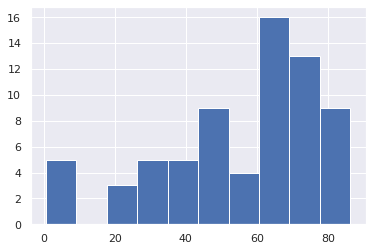

In [23]:
df_covid_filtered['people_fully_vaccinated_per_hundred'].hist()

In [24]:
df_covid_filtered.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.140000e+02,214.000000,214.000000,201.000000,201.000000,201.000000,214.000000,214.000000,214.000000,201.000000,...,144.000000,95.000000,172.000000,224.000000,189.000000,2.270000e+02,0.0,0.0,0.0,0.0
mean,1.353928e+06,5618.602804,6549.111458,27214.925373,21.199005,31.186965,66502.543864,387.018238,413.564645,1002.246910,...,32.897917,50.690516,3.099291,73.529688,0.722423,3.512299e+07,NaN,NaN,NaN,NaN
std,4.961770e+06,25065.182470,33010.941066,89144.603720,80.662570,124.898464,68875.896575,905.601675,765.884935,1090.430897,...,13.668536,32.280746,2.563063,7.461901,0.149791,1.387420e+08,NaN,NaN,NaN,NaN
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,8.758000,0.000000,0.000000,2.948000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,NaN,NaN,NaN,NaN
25%,1.529900e+04,0.000000,48.892750,287.000000,0.000000,0.143000,4481.227750,0.000000,7.001000,116.048000,...,22.350000,20.105000,1.300000,68.857500,0.602000,5.632275e+05,NaN,NaN,NaN,NaN
50%,1.433005e+05,192.000000,339.143000,2444.000000,0.000000,1.571000,49417.069000,25.591000,84.899000,603.656000,...,32.250000,49.542000,2.450000,74.995000,0.740000,5.882259e+06,NaN,NaN,NaN,NaN
75%,7.260168e+05,1294.250000,1584.714250,13850.000000,8.000000,12.143000,107313.915000,267.980250,424.500250,1664.194000,...,41.350000,82.871500,4.202500,78.980000,0.829000,2.328358e+07,NaN,NaN,NaN,NaN
max,5.509984e+07,219126.000000,410753.571000,825907.000000,825.000000,1354.429000,297333.517000,5967.958000,4672.490000,5954.286000,...,78.100000,100.000000,13.800000,86.750000,0.957000,1.425887e+09,NaN,NaN,NaN,NaN


---

# 5. Selecting and Filtering Data

In SQL, we use the `WHERE` clause to filter a table. 

In Python, the easiest way to filter a `DataFrame` by row is to first generate a `Series` of boolean values, then apply it to the `DataFrame`.

*Example 1:* filter out admission with missing `DEATHTIME` in the MIMIC dataset. 

In [25]:
df['DEATHTIME'].notna() # for the opposite criteria, use `.isna()`

0        False
1        False
2        False
3        False
4        False
         ...  
58971    False
58972    False
58973    False
58974    False
58975    False
Name: DEATHTIME, Length: 58976, dtype: bool

In [26]:
df[df['DEATHTIME'].notna()] # note that the number of rows dropped from 58976 to 53122

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
70,2734,2261,124642,2119-09-09 08:25:00,2119-09-13 04:35:00,2119-09-13 04:35:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,None,None,None,WHITE,2119-09-08 22:06:00,2119-09-09 09:15:00,ALLERGIC REACTION/LABILE HTN,1,1
71,8729,7157,189452,2137-12-21 12:56:00,2137-12-22 04:20:00,2137-12-22 04:20:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,None,None,UNKNOWN/NOT SPECIFIED,2137-12-21 11:47:00,2137-12-21 12:18:00,S/P FALL,1,1
72,10081,8239,156930,2169-01-26 18:15:00,2169-01-27 02:20:00,2169-01-27 02:20:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,TRAUMA,1,1
73,8297,6825,138726,2181-03-13 20:09:00,2181-03-18 20:03:00,2181-03-18 20:03:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,None,None,None,WHITE,2181-03-13 15:39:00,2181-03-13 18:21:00,ALTERED MENTAL STATUS,1,1
74,14750,11999,144909,2108-08-09 10:35:00,2108-08-11 04:51:00,2108-08-11 04:51:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,None,None,WHITE,2108-08-09 09:21:00,2108-08-09 11:12:00,MULTIPLE GUNSHOT WOUNDS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58928,55900,90478,170943,2125-07-12 06:03:00,2125-07-14 10:30:00,2125-07-14 10:30:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Self Pay,ENGL,NOT SPECIFIED,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,2125-07-12 05:11:00,2125-07-12 07:16:00,INTRACRANIAL HEMORRHAGE;RESPIRTORY FAILURE,1,1
58929,54623,86359,164038,2108-03-23 17:46:00,2108-04-22 00:00:00,2108-04-21 00:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,NOT SPECIFIED,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,NaT,NaT,SEIZURES,1,1
58962,33875,27711,135403,2187-10-07 16:11:00,2187-10-15 18:30:00,2187-10-15 18:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,2187-10-07 13:08:00,2187-10-07 18:45:00,HYPOTENSION;SHORTNESS OF BREATH;ACUTE RENAL FA...,1,1
58963,6633,5453,171739,2196-02-12 16:49:00,2196-03-09 20:52:00,2196-03-09 20:52:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicaid,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,2196-02-12 13:22:00,2196-02-12 21:26:00,CONFUSION,1,1


*Example 2:* using `df_covid_filtered`, select countries with more than 1,000 `total_deaths_per_million` and less than 50 `people_vaccinated_per_hundred`.

In [27]:
(df_covid_filtered['total_deaths_per_million'] > 1000) & (df_covid_filtered['people_vaccinated_per_hundred'] < 50)

677       False
2833      False
3905      False
4971      False
6019      False
          ...  
247674    False
249547    False
251681    False
252731    False
253779    False
Length: 227, dtype: bool

In [28]:
df_covid_filtered[(df_covid_filtered['total_deaths_per_million'] > 1000) & (df_covid_filtered['people_vaccinated_per_hundred'] < 50)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
27401,BOL,South America,Bolivia,2022-01-01,599753.0,0.0,3500.857,19680.0,0.0,21.429,...,NaN,25.383,1.100,71.51,0.718,12224114.0,NaN,NaN,NaN,NaN
125694,LBN,Asia,Lebanon,2022-01-01,731288.0,3358.0,2861.286,9136.0,17.0,15.571,...,40.7,NaN,2.900,78.93,0.744,5489744.0,NaN,NaN,NaN,NaN
150843,MNE,Europe,Montenegro,2022-01-01,171873.0,1839.0,1292.143,2414.0,3.0,3.714,...,47.9,NaN,3.861,76.88,0.829,627082.0,NaN,NaN,NaN,NaN
201483,SRB,Europe,Serbia,2022-01-01,1300949.0,1610.0,1636.571,12739.0,25.0,24.429,...,40.2,97.719,5.609,76.00,0.806,6871547.0,NaN,NaN,NaN,NaN
210366,ZAF,Africa,South Africa,2022-01-01,3468079.0,9793.0,8591.714,91198.0,53.0,60.714,...,33.2,43.993,2.320,64.13,0.709,59893884.0,NaN,NaN,NaN,NaN
229742,TTO,North America,Trinidad and Tobago,2022-01-01,92201.0,302.0,405.286,2883.0,14.0,20.714,...,NaN,89.443,3.000,73.51,0.796,1531043.0,NaN,NaN,NaN,NaN


---

# 6. References

* [Getting Started with BigQuery](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=OHCBQv4uTCPc)
* [Intro to pandas in Colab](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb#scrollTo=rHLcriKWLRe4)
* Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: <https://ourworldindata.org/coronavirus> 
[Online Resource]